In [1]:
distances = [
    [None, 2, None, 1, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
    [2, None, 2, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
    [None, 2, None, None, None, None, None, 1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, 1, None, None, None, None, None, 2, None, None, None, None, None, None, None],
    [None, None, None, 1, None, 1, None, None, 1, None, None, None, None, None, None, None, None, None], # 5
    [None, 1, None, None, 1, None, 1, None, None, None, None, None, None, None, None, None, None, None],
    [None, None, None, None, None, 1, None, 1, None, 1, None, None, None, None, None, None, None, None],
    [None, None, 1, None, None, None, 1, None, None, None, None, None, None, None, 2, None, None, None],
    [None, None, None, None, 1, None, None, None, None, 2, None, 1, None, None, None, None, None, None],
    [None, None, None, None, None, None, 1, None, 2, None, None, None, None, 1, None, None, None, None], # 10
    [None, None, None, 2, None, None, None, None, None, None, None, 1, None, None, None, 1, None, None],
    [None, None, None, None, None, None, None, None, 1, None, 1, None, 1, None, None, None, None, None],
    [None, None, None, None, None, None, None, None, None, None, None, 1, None, 1, None, None, None, None],
    [None, None, None, None, None, None, None, None, None, 1, None, None, 1, None, 1, None, None, None],
    [None, None, None, None, None, None, None, 2, None, None, None, None, None, 1, None, None, None, 1], # 15
    [None, None, None, None, None, None, None, None, None, None, 1, None, None, None, None, None, 2, None],
    [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 2, None, 2],
    [None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1, None, 2, None]
]

In [2]:
distances

[[None,
  2,
  None,
  1,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [2,
  None,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  2,
  None,
  None,
  None,
  None,
  None,
  1,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [1,
  None,
  None,
  None,
  1,
  None,
  None,
  None,
  None,
  None,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  1,
  None,
  1,
  None,
  None,
  1,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  1,
  None,
  None,
  1,
  None,
  1,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  1,
  None,
  1,
  None,
  1,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  1,
  None,
  None,
  

In [3]:
def get_possible_paths(state, visited):
    return [i for i in range(1, 19) if distances[state - 1][i - 1] is not None and i not in visited]

In [18]:
def calculate_route_length(visited):
    return sum([distances[visited[i] - 1][visited[i + 1] - 1] for i in range(len(visited) - 1)])

In [79]:
def dfs(state, path):
    if state == goal:
        all_paths.append(path[:])
        return
    for next_state in get_possible_paths(state, visited):
        if next_state not in visited:
            visited.append(next_state)
            path.append(next_state)
            dfs(next_state, path)
            path.pop()
            visited.pop()


In [80]:
start = 1
goal = 18

visited = [start]

all_paths = []

dfs(start, [start])

In [82]:
max_length = 0
max_path = []
for path in all_paths:
    if calculate_route_length(path) > max_length:
        max_length = calculate_route_length(path)
        max_path = path

In [83]:
max_path, max_length

([1, 2, 3, 8, 15, 14, 13, 12, 9, 10, 7, 6, 5, 4, 11, 16, 17, 18], 24)

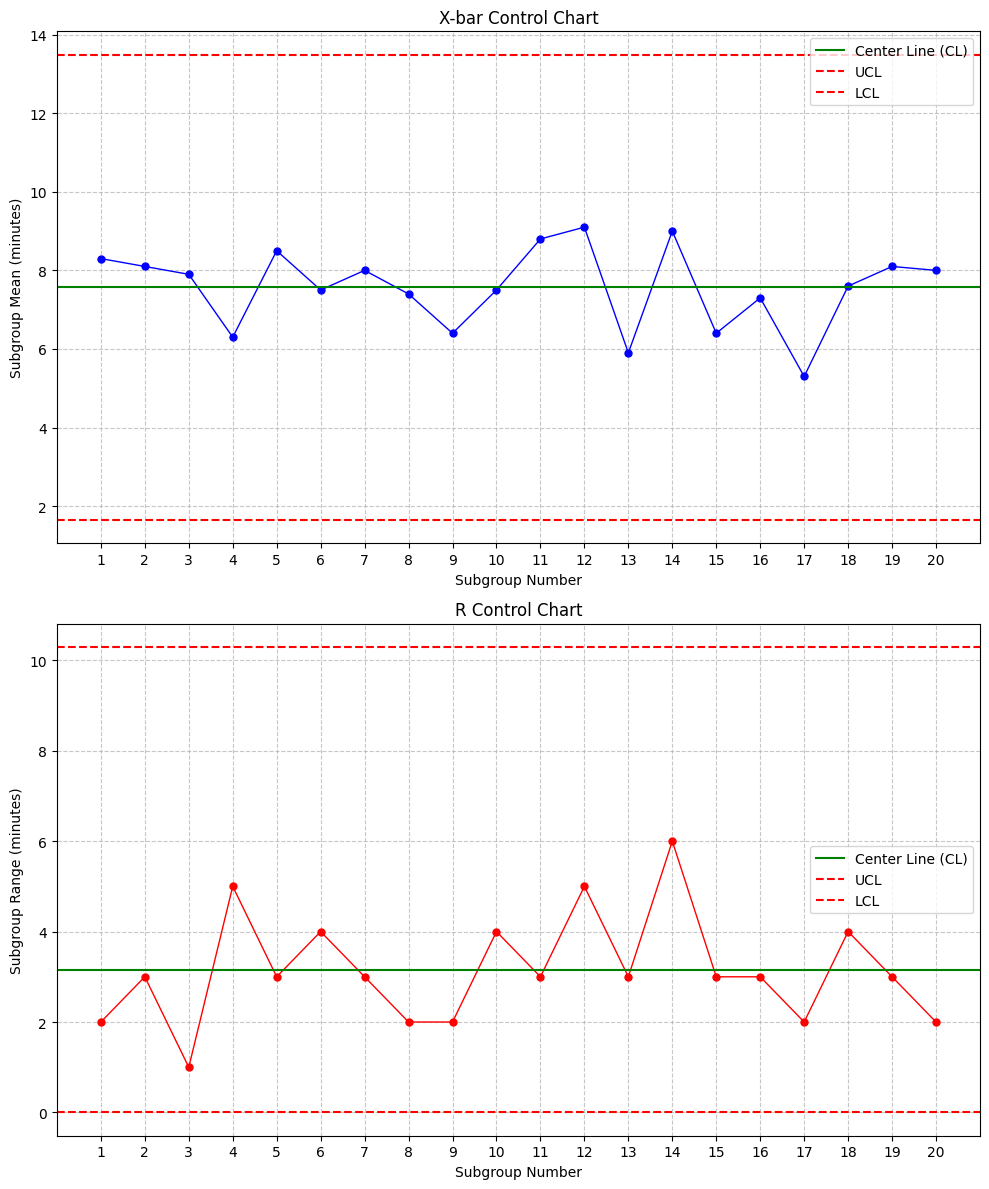

Process Control Assessment:
- All X-bar values fall within control limits: True
- All R values fall within control limits: True
Since all points are within control limits on both charts, the process appears to be in statistical control.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the problem
subgroups = np.arange(1, 21)
xbar_values = [8.3, 8.1, 7.9, 6.3, 8.5, 7.5, 8.0, 7.4, 6.4, 7.5, 
               8.8, 9.1, 5.9, 9.0, 6.4, 7.3, 5.3, 7.6, 8.1, 8.0]
r_values = [2, 3, 1, 5, 3, 4, 3, 2, 2, 4, 
            3, 5, 3, 6, 3, 3, 2, 4, 3, 2]

# Control limits calculated in part a
xbar_bar = 7.57
r_bar = 3.15
ucl_xbar = 13.492
lcl_xbar = 1.648
ucl_r = 10.291
lcl_r = 0

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot X-bar chart
ax1.plot(subgroups, xbar_values, 'bo-', linewidth=1, markersize=5)
ax1.axhline(y=xbar_bar, color='g', linestyle='-', label='Center Line (CL)')
ax1.axhline(y=ucl_xbar, color='r', linestyle='--', label='UCL')
ax1.axhline(y=lcl_xbar, color='r', linestyle='--', label='LCL')
ax1.set_title('X-bar Control Chart')
ax1.set_xlabel('Subgroup Number')
ax1.set_ylabel('Subgroup Mean (minutes)')
ax1.set_xlim(0, 21)
ax1.set_xticks(subgroups)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

# Plot R chart
ax2.plot(subgroups, r_values, 'ro-', linewidth=1, markersize=5)
ax2.axhline(y=r_bar, color='g', linestyle='-', label='Center Line (CL)')
ax2.axhline(y=ucl_r, color='r', linestyle='--', label='UCL')
ax2.axhline(y=lcl_r, color='r', linestyle='--', label='LCL')
ax2.set_title('R Control Chart')
ax2.set_xlabel('Subgroup Number')
ax2.set_ylabel('Subgroup Range (minutes)')
ax2.set_xlim(0, 21)
ax2.set_xticks(subgroups)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.savefig('patient_admission_control_charts.png', dpi=300)
plt.show()

# Assessment of process control
print("Process Control Assessment:")
print("- All X-bar values fall within control limits:", all(lcl_xbar < x < ucl_xbar for x in xbar_values))
print("- All R values fall within control limits:", all(lcl_r < r < ucl_r for r in r_values))
print("Since all points are within control limits on both charts, the process appears to be in statistical control.")